Objective : In order to prevent a loan from turning default, banks need to figure out how to make
predictions based on customers’ behaviors. Machine learning models appear to be one of
the most effective solutions for predicting loans default. Therefore, the objective of this
project is to build supervised models for loans default predictions and to explore the
impact of customer behavioral factors on making predictions further.

In [1]:
""" required packages to run model """
import pandas as pd  # for manipulating dataframes
from datetime import datetime # for converting date and time

from sklearn.preprocessing import LabelEncoder  # encoding data
from sklearn.model_selection import train_test_split  # splitting data
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler  # scaling data between 2 values
from sklearn.feature_selection import SelectKBest, f_classif  # feature engineering models
import xgboost as xgbo # showing features impact

from sklearn.linear_model import LogisticRegression# Tested Models
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier


from sklearn.metrics import classification_report  # for evaluating results
from sklearn.metrics import confusion_matrix  # for evaluating results
import matplotlib.pyplot as plt  # plotting data
import seaborn as sns  # plotting data


""" read train data """
train_data = pd.read_csv("train_v3.csv")
""" exploring train data """
train_data.shape  # shape of train data (how many lines and columns)


(614, 13)

# Data Mining

In [2]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#statistics around th train dataset
train_data.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
""" read test data """
test_data_for_csv = pd.read_csv("test_v3.csv")
test_data = pd.read_csv("test_v3.csv")
""" exploring test data """
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [5]:
test_data.shape

(367, 12)

In [6]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows',3000)

In [8]:
train_data#.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [9]:
train_data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [10]:
train_data.isna().sum()
#Nan value number in the dataset

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
train_data.shape

(614, 13)

In [12]:
""" dropping unecessary rows (NAN ) and columns
 We've decided to drop these columns after some feature engineering 
"""
train_data = train_data.dropna()
train_data = train_data.drop(['Loan_ID'],axis=1)

In [13]:
train_data.shape# 1/5 training data gone
134/614

0.2182410423452769

In [14]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [15]:
train_data.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      405
CoapplicantIncome    232
LoanAmount           186
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [16]:
test_data.columns
#suppress useless column
test_data = test_data.drop(['Loan_ID'], axis=1)


In [17]:
test_data.shape

(367, 11)

In [18]:
test_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
Gender               480 non-null object
Married              480 non-null object
Dependents           480 non-null object
Education            480 non-null object
Self_Employed        480 non-null object
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null float64
Property_Area        480 non-null object
Loan_Status          480 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


In [20]:
""" get list of categorical features """
categorical_features = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

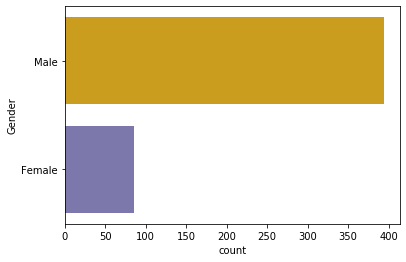

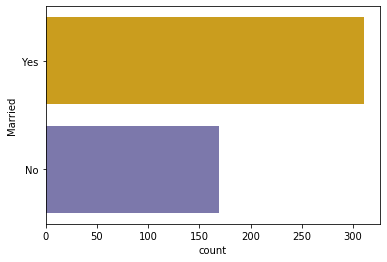

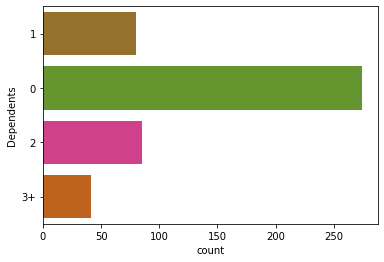

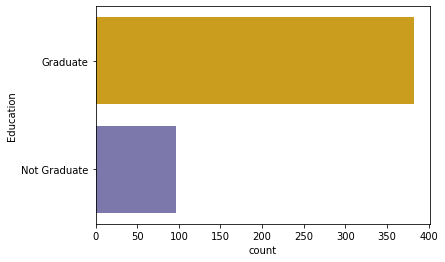

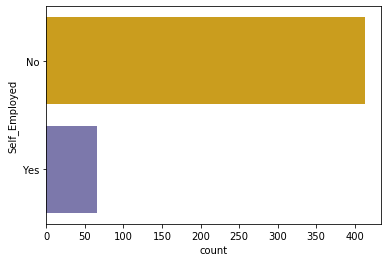

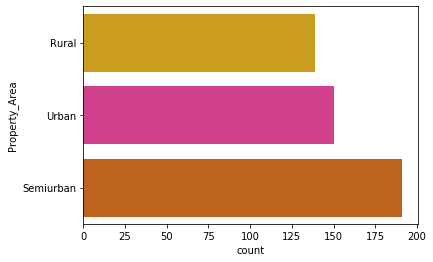

In [21]:
""" plot categorical features """

for i, categorical_feature in enumerate(categorical_features):
    m = sns.countplot(data=train_data, y = categorical_feature, palette='Dark2_r', orient = 'v')#.set_title(categorical_feature)
    plt.show()

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
Gender               480 non-null object
Married              480 non-null object
Dependents           480 non-null object
Education            480 non-null object
Self_Employed        480 non-null object
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null float64
Property_Area        480 non-null object
Loan_Status          480 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 68.8+ KB


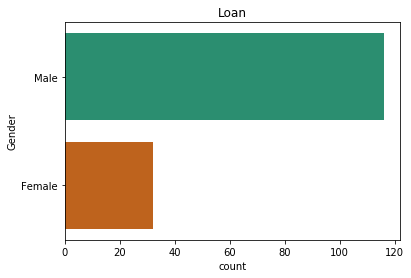

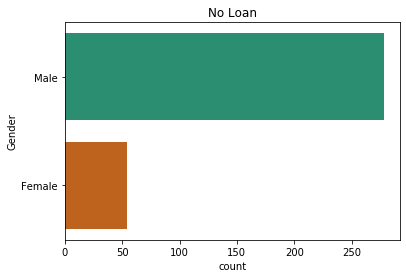

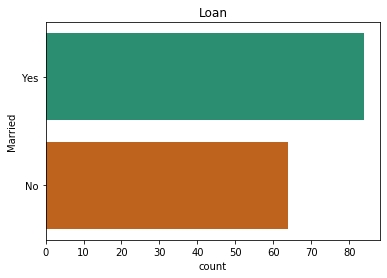

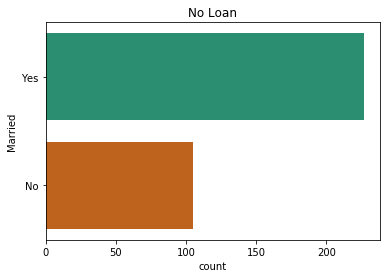

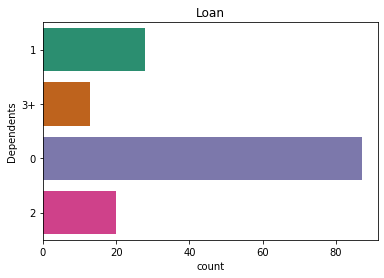

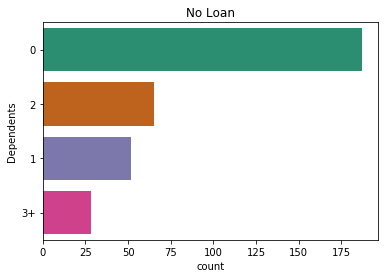

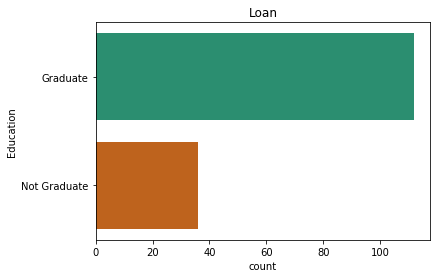

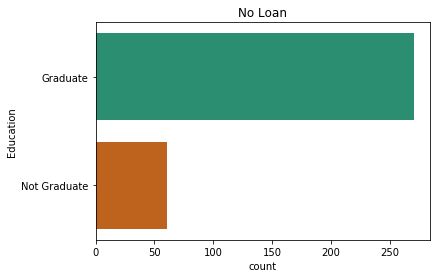

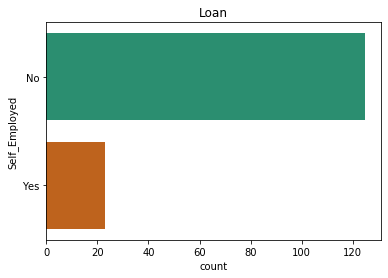

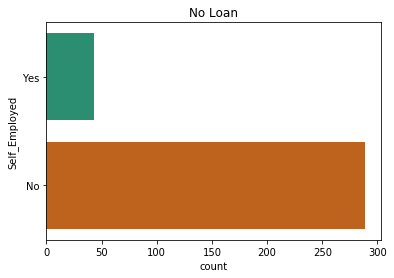

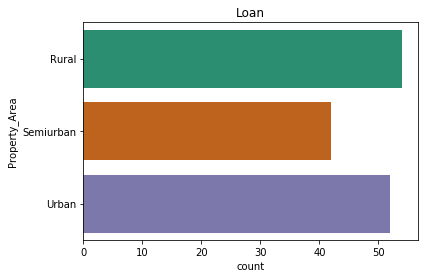

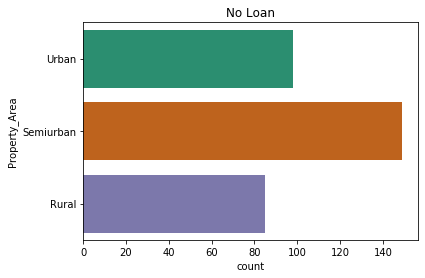

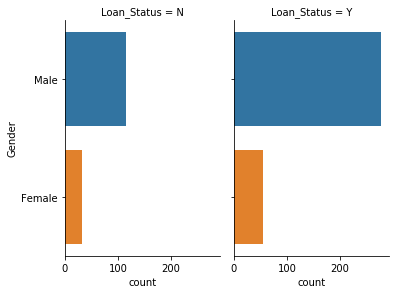

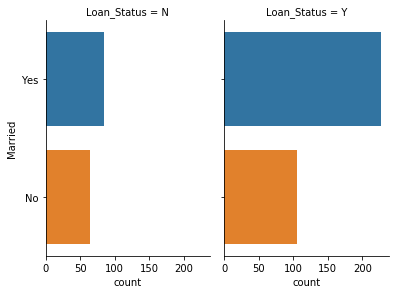

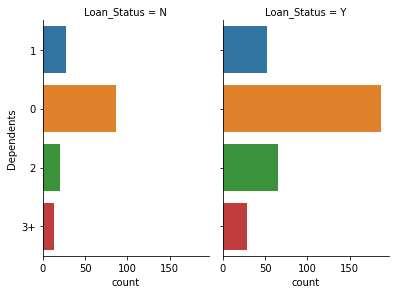

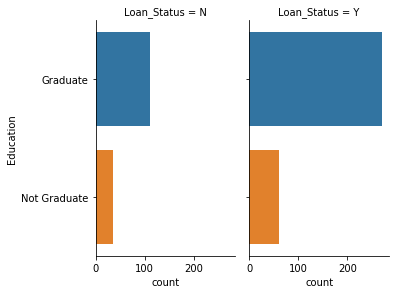

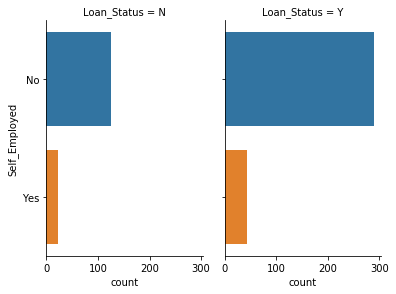

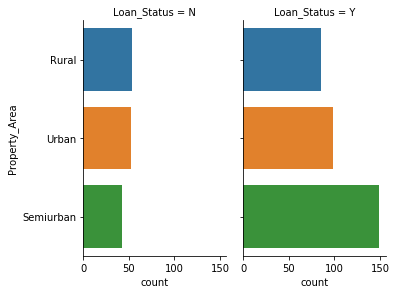

In [23]:
""" plot categorical features with the target variable """  # Men are more likely to have bank account than women
for feature in categorical_features:
    m = sns.countplot(data=train_data[train_data.Loan_Status == 'N'], y = feature, palette='Dark2', orient = 'v').set_title("Loan")
    plt.show()
    m = sns.countplot(data=train_data[train_data.Loan_Status == 'Y'], y = feature, palette='Dark2', orient = 'v').set_title("No Loan")
    plt.show()
    
for feature in categorical_features:
    g = sns.catplot(y=feature, col="Loan_Status",data=train_data, kind="count", height=4, aspect=.7);


Gender


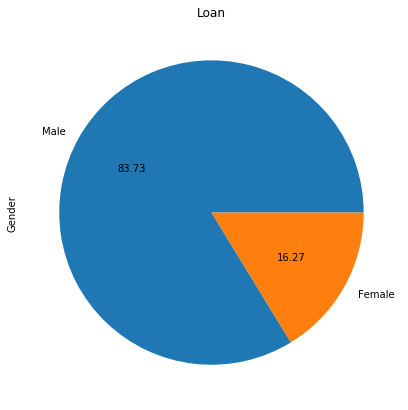

Married


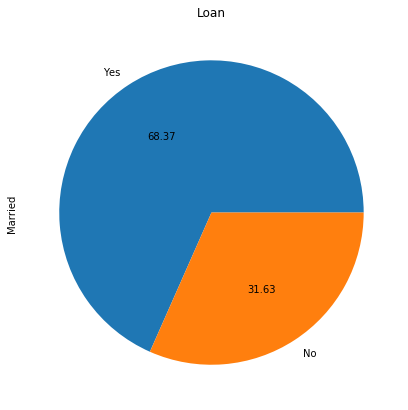

Dependents


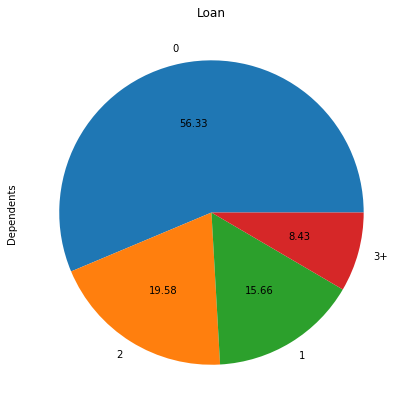

Education


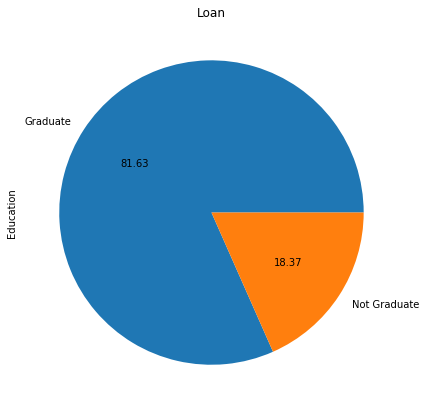

Self_Employed


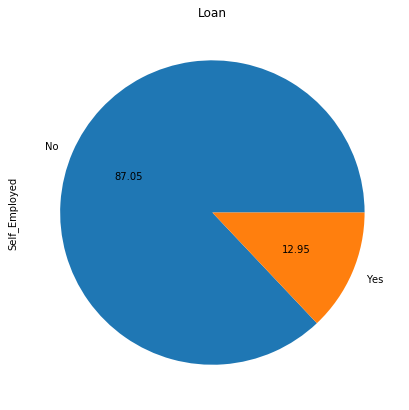

Property_Area


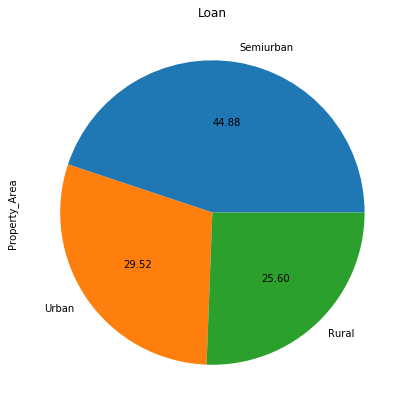

Gender


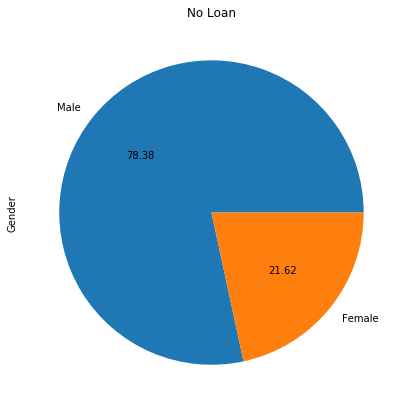

Married


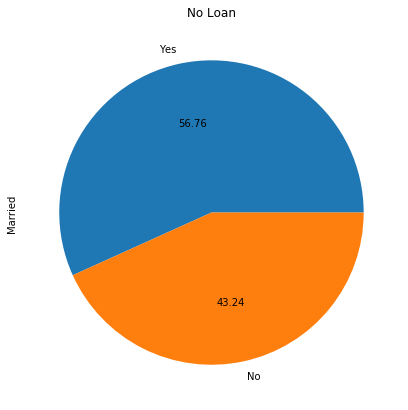

Dependents


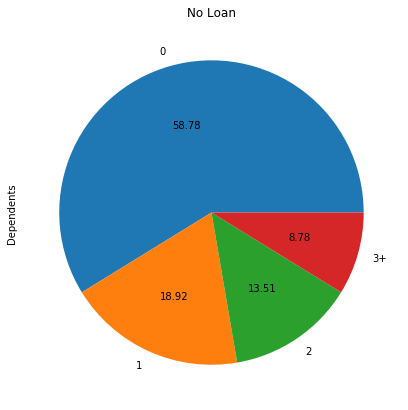

Education


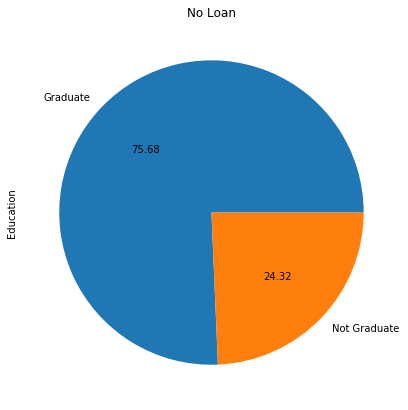

Self_Employed


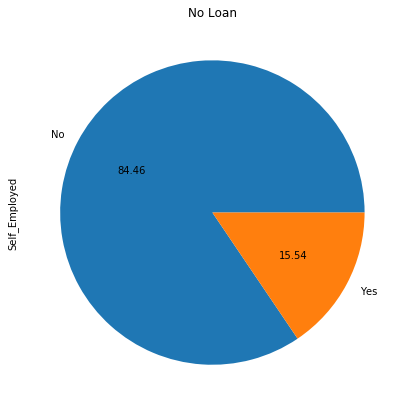

Property_Area


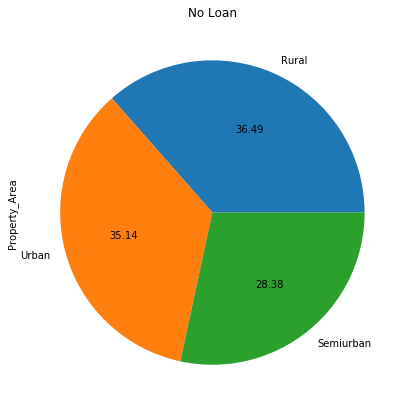

In [24]:
# pie chart on categorical features
for feature in categorical_features:
    print(feature)
    train_data[train_data.Loan_Status=='Y'][feature].value_counts().plot(kind='pie',figsize=(7, 7),
                                                                       autopct='%.2f').set_title("Loan")
    plt.show()

for feature in categorical_features:
    print(feature)
    train_data[train_data.Loan_Status=='N'][feature].value_counts().plot(kind='pie',figsize=(7, 7),
                                                                       autopct='%.2f').set_title("No Loan")
    plt.show()

In [25]:
""" plot numerical features """
train_data.info()

# It enables to select numerical features to plot

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
Gender               480 non-null object
Married              480 non-null object
Dependents           480 non-null object
Education            480 non-null object
Self_Employed        480 non-null object
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null float64
Property_Area        480 non-null object
Loan_Status          480 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 68.8+ KB


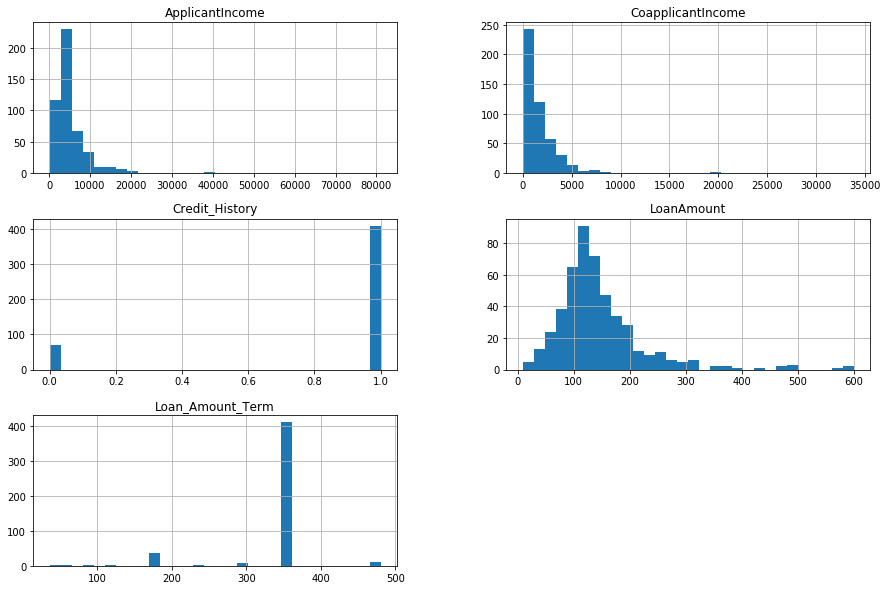

In [26]:
numerical_features = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
train_data[numerical_features].describe()
train_data[numerical_features].hist(bins=30, figsize=(15, 10))
#for features in numerical_features:
 #   m = sns.distplot(train_data[features],bins=30)
plt.show()

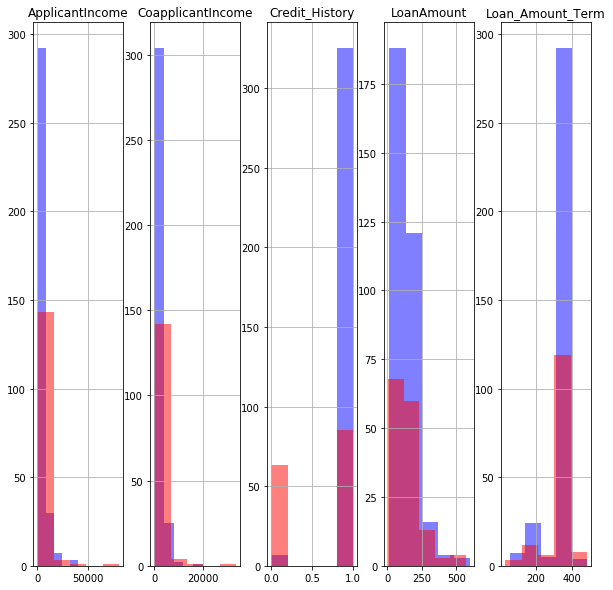

In [27]:
""" plot numerical features with the target variable """
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
train_data[train_data.Loan_Status == 'Y'][numerical_features].hist(bins=5, color="blue", alpha=0.5, ax=ax)
train_data[train_data.Loan_Status == 'N'][numerical_features].hist(bins=5, color="red", alpha=0.5, ax=ax)
plt.show()

ApplicantIncome


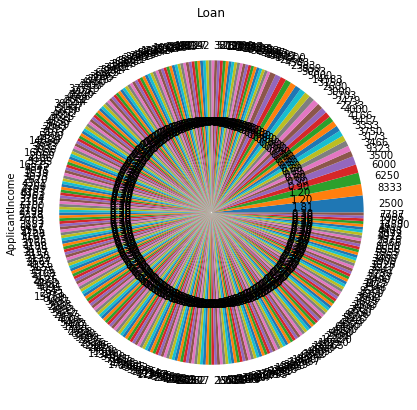

CoapplicantIncome


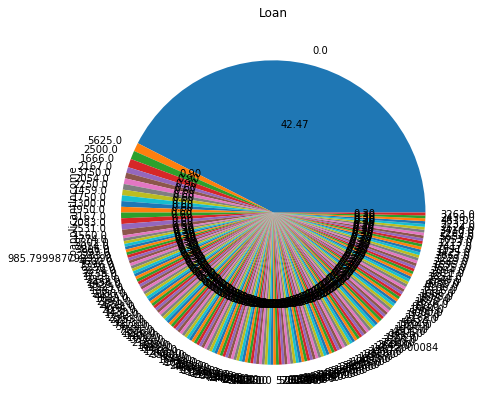

LoanAmount


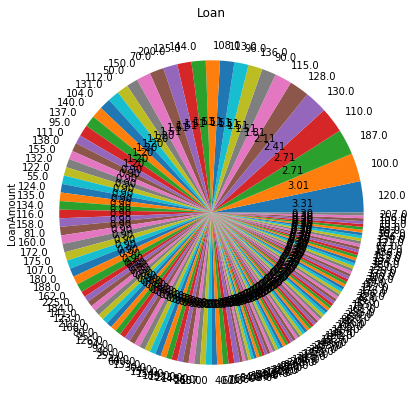

Loan_Amount_Term


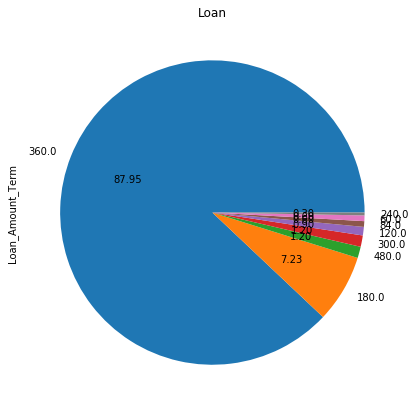

Credit_History


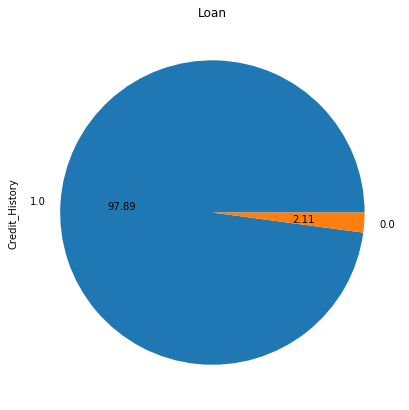

ApplicantIncome


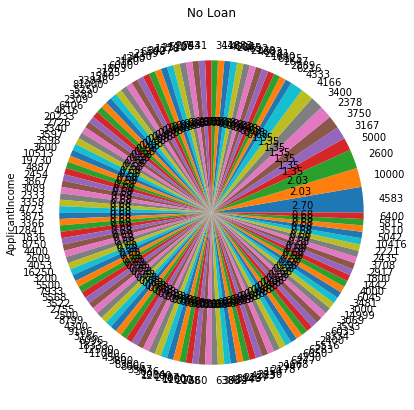

CoapplicantIncome


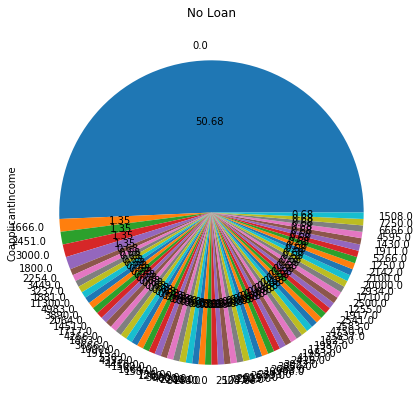

LoanAmount


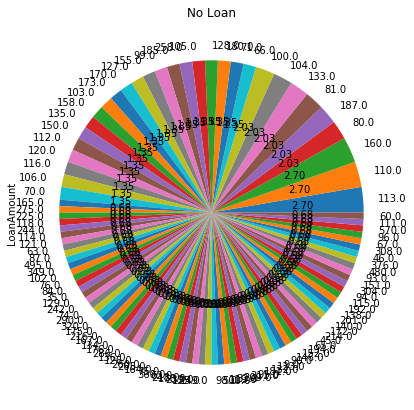

Loan_Amount_Term


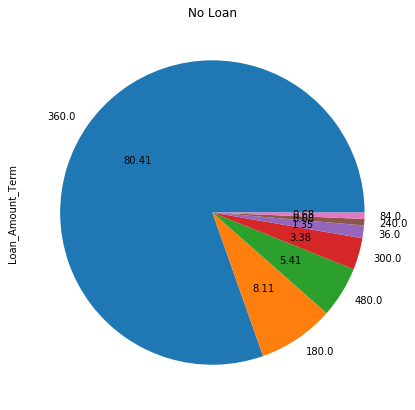

Credit_History


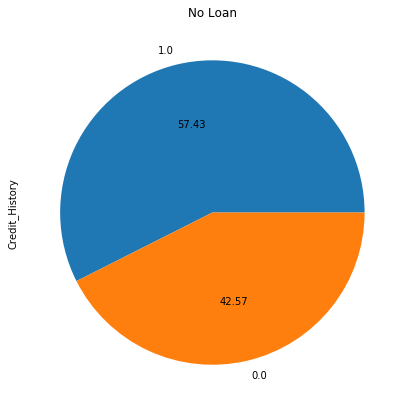

In [28]:
for feature in numerical_features:
    print(feature)
    train_data[train_data.Loan_Status=='Y'][feature].value_counts().plot(kind='pie',figsize=(7, 7),
                                                                       autopct='%.2f').set_title("Loan")
    plt.show()
    
for feature in numerical_features:
    print(feature)
    train_data[train_data.Loan_Status=='N'][feature].value_counts().plot(kind='pie',figsize=(7, 7),
                                                                       autopct='%.2f').set_title("No Loan")
    plt.show()

In [29]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


# Preparing the data 

In [30]:
""" Separate the target variable and rest of the variables """
X = train_data.drop(['Loan_Status'], axis=1)
Y = train_data.Loan_Status

""" label encoding target variable (binary classification) """
# 1 means have bank_account, 0 means does not have bank_account
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
Y



array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [31]:
X.shape
""" One hot encoding of other categorical variables """
X = pd.get_dummies(X)
X.shape

(480, 20)

In [32]:
#Features list
features = list(X.columns)
#features

In [33]:
test_data = pd.get_dummies(test_data)

In [34]:
test_data.shape

(367, 20)

In [35]:
""" scaling features to [0,1] interval """
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

test_data = scaler.fit_transform(test_data)

In [36]:
""" feature engineering/selection """

bestfeatures = SelectKBest(score_func=f_classif, k=5)
bf = bestfeatures.fit(X, Y)
dfscores = pd.DataFrame(bf.scores_)
print("df scores :", dfscores)
dfcolumns = pd.DataFrame(pd.DataFrame(X).columns)
print(dfcolumns)
print(type(dfcolumns))

df scores :              0
0     0.891725
1     1.151359
2     2.473684
3     0.029065
4   186.122727
5     1.997174
6     1.997174
7     6.107491
8     6.107491
9     0.251636
10    0.779517
11    2.586954
12    0.015990
13    2.249320
14    2.249320
15    0.576742
16    0.576742
17    5.943032
18   11.873547
19    1.501770
     0
0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
10  10
11  11
12  12
13  13
14  14
15  15
16  16
17  17
18  18
19  19
<class 'pandas.core.frame.DataFrame'>


In [37]:
""" concat two dataframes for better visualization """
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores

,0,0
0,0,0.891725
1,1,1.151359
2,2,2.473684
3,3,0.029065
4,4,186.122727
5,5,1.997174
6,6,1.997174
7,7,6.107491
8,8,6.107491
9,9,0.251636


In [38]:
train_data.shape


(480, 12)

In [39]:
X.shape

(480, 20)

In [40]:
X

array([[0.05482993, 0.0445666 , 0.20135364, ..., 1.        , 0.        ,
        0.        ],
       [0.03525046, 0.        , 0.0964467 , ..., 0.        , 0.        ,
        1.        ],
       [0.03009276, 0.06968703, 0.18781726, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.09798392, 0.00709283, 0.41285956, ..., 0.        , 0.        ,
        1.        ],
       [0.09193568, 0.        , 0.30118443, ..., 0.        , 0.        ,
        1.        ],
       [0.05482993, 0.        , 0.20981387, ..., 0.        , 1.        ,
        0.        ]])

In [41]:
""" split the data into train and test data """
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print('X_train shape : ',X_train.shape)
print('y_test shape : ',y_test.shape)
print('X_test shape : ',X_test.shape)
print('test_data shape : ',test_data.shape)

X_train shape :  (384, 20)
y_test shape :  (96,)
X_test shape :  (96, 20)
test_data shape :  (367, 20)


# Building Machine Learning models

LOGISTIC REGRESSION

In [42]:
""" Applying Logistic Regression algorithm """

logreg = LogisticRegression()
logreg.fit(X_train,y_train)


y_pred_reg_train = logreg.predict(X_train)
y_pred_reg_test = logreg.predict(X_test)

acc_reg_train = accuracy_score(y_train, y_pred_reg_train)
acc_reg_test = accuracy_score(y_test, y_pred_reg_test)

print(" logistic regression on train set : {:.2f}%".format((acc_reg_train*100)))
print(" logistic regression on test set : {:.2f}%".format((acc_reg_test*100)))

 logistic regression on train set : 80.47%
 logistic regression on test set : 82.29%


C:\Users\william.tin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


DECISION TREE

In [43]:
""" Applying Decision Tree algorithm """

DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train,y_train)

y_pred_DT_train = DT.predict(X_train)
y_pred_DT_test = DT.predict(X_test)

acc_DT_train = accuracy_score(y_train, y_pred_DT_train)
acc_DT_test = accuracy_score(y_test, y_pred_DT_test)

print(" Decision Tree on train set : {:.2f}%".format((acc_DT_train*100)))
print(" Decision Tree on test set : {:.2f}%".format((acc_DT_test*100)))

 Decision Tree on train set : 100.00%
 Decision Tree on test set : 72.92%


RANDOM FORREST

In [44]:
""" Applying Random Forrest algorithm """

RFC = RandomForestClassifier(max_depth=15, n_estimators=100,random_state=42)
RFC = RFC.fit(X_train, y_train)

y_pred_RFC_train = RFC.predict(X_train)
y_pred_RFC_test = RFC.predict(X_test)

acc_RFC_train = accuracy_score(y_train, y_pred_RFC_train)
acc_RFC_test = accuracy_score(y_test, y_pred_RFC_test)

print(" Random forrest on train set : {:.2f}%".format((acc_RFC_train*100)))
print(" Random forrest on test set : {:.2f}%".format((acc_RFC_test*100)))

 Random forrest on train set : 99.74%
 Random forrest on test set : 83.33%


XGBOOST Model

In [45]:
""" applying XGBoost algorithm """
xgb = XGBClassifier(booster = 'gbtree',
    eta=0.2,
    gamma = 0,
    max_depth=15,
    colsample_bytree=0.9,
    min_child_weight=1,
    subsample = 1,
    learning_rate=0.05,
    n_estimators=100,
    objective = "binary:logistic",
    random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb_train = xgb.predict(X_train)
y_pred_xgb_test = xgb.predict(X_test)

acc_xgb_train = accuracy_score(y_train, y_pred_xgb_train)
acc_xgb_test = accuracy_score(y_test, y_pred_xgb_test)

print(" xgboost on train set : {:.2f}%".format((acc_xgb_train*100)))
print(" xgboost on test set : {:.2f}%".format((acc_xgb_test*100)))

 xgboost on train set : 99.48%
 xgboost on test set : 80.21%


Dummy Model

In [46]:
""" Applying Dummy Model"""

dummy = DummyClassifier()
dummy = dummy.fit(X_train, y_train)

y_pred_dummy_train = dummy.predict(X_train)
y_pred_dummy_test = dummy.predict(X_test)

acc_dummy_train = accuracy_score(y_train, y_pred_dummy_train)
acc_dummy_test = accuracy_score(y_test, y_pred_dummy_test)

print(" dummy on train set : {:.2f}%".format((acc_dummy_train*100)))
print(" dummy on test set : {:.2f}%".format((acc_dummy_test*100)))

 dummy on train set : 57.03%
 dummy on test set : 60.42%


# Results / Reports

In [47]:
""" plotting confusion matrix """
cm_reg = confusion_matrix(y_test, y_pred_reg_test)
cm_DT = confusion_matrix(y_test, y_pred_DT_test)
cm_RFC = confusion_matrix(y_test, y_pred_RFC_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb_test)
cm_dummy = confusion_matrix(y_test, y_pred_dummy_test)
#plt.figure(figsize=(10, 7))
#sns.heatmap(cm, annot=True)
#plt.show()
print("Confusion Matrix for Logistic regression : \n", cm_reg)
print("Confusion Matrix for Decision Tree : \n", cm_DT)
print("Confusion Matrix for Random Forrest : \n", cm_RFC)
print("Confusion Matrix pour XGboost : \n", cm_xgb)
print("Confusion Matrix pour Dummy : \n", cm_dummy)

Confusion Matrix for Logistic regression : 
 [[11 17]
 [ 0 68]]
Confusion Matrix for Decision Tree : 
 [[16 12]
 [14 54]]
Confusion Matrix for Random Forrest : 
 [[14 14]
 [ 2 66]]
Confusion Matrix pour XGboost : 
 [[15 13]
 [ 6 62]]
Confusion Matrix pour Dummy : 
 [[10 18]
 [20 48]]


In [48]:
predictions = pd.DataFrame(y_pred_xgb_test)
predictions[0].value_counts()


1    75
0    21
Name: 0, dtype: int64

In [49]:
predictions

,0
0,1
1,1
2,1
3,0
4,1
5,0
6,1
7,1
8,1
9,0


In [50]:
prediction_true = pd.DataFrame(y_test)
prediction_true[0].value_counts()

1    68
0    28
Name: 0, dtype: int64

In [51]:
test_data.shape
print("classification report for Logistic Regression : \n ", classification_report(y_test, y_pred_reg_test,
                                                                                   target_names=["No loan","Loan"]))
print("classification report for Decision Tree : \n ", classification_report(y_test, y_pred_DT_test,
                                                                             target_names=["No loan","Loan"]))
print("classification report for Random Forrest : \n ", classification_report(y_test, y_pred_RFC_test, 
                                                                              target_names=["No loan","Loan"]))
print("classification report XGboost : \n ", classification_report(y_test, y_pred_xgb_test,
                                                                   target_names=["No loan","Loan"]))
print("classification report Dummy : \n ", classification_report(y_test, y_pred_dummy_test,
                                                                 target_names=["No loan","Loan"]))

classification report for Logistic Regression : 
                precision    recall  f1-score   support

     No loan       1.00      0.39      0.56        28
        Loan       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96

classification report for Decision Tree : 
                precision    recall  f1-score   support

     No loan       0.53      0.57      0.55        28
        Loan       0.82      0.79      0.81        68

    accuracy                           0.73        96
   macro avg       0.68      0.68      0.68        96
weighted avg       0.74      0.73      0.73        96

classification report for Random Forrest : 
                precision    recall  f1-score   support

     No loan       0.88      0.50      0.64        28
        Loan       0.82      0.97      0.89        68

    accuracy                           0

BONUS

In [52]:
my_list = ['apple', 'banana', 'grapes', 'pear']
for c, value in enumerate(my_list):
    print(c, value)

0 apple
1 banana
2 grapes
3 pear


[Text(0, 0, 'ApplicantIncome'),
 Text(0, 0, 'CoapplicantIncome'),
 Text(0, 0, 'LoanAmount'),
 Text(0, 0, 'Loan_Amount_Term'),
 Text(0, 0, 'Credit_History'),
 Text(0, 0, 'Gender_Female'),
 Text(0, 0, 'Gender_Male')]

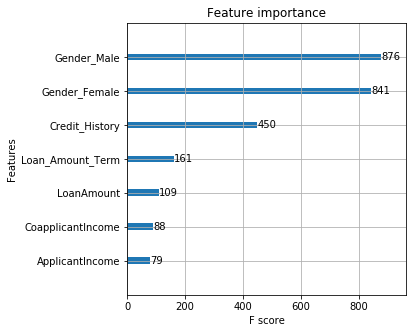

In [53]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
xgbo.plot_importance(xgb,max_num_features = 7, ax=ax).set_yticklabels(features)
